In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats 

In [11]:
#Doing Linear Regression First
#Creating Fake Data

In [12]:
page_speed_read = np.random.normal(3.0, 1, 1000)

purchase_book = 100 - (page_speed_read + np.random.normal(0, 0.1, 1000)*3)

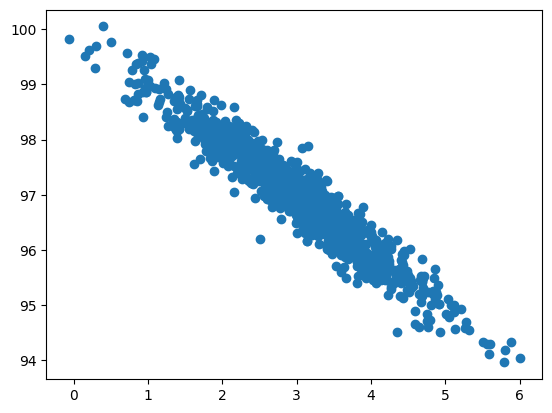

In [13]:
plt.scatter(page_speed_read, purchase_book)

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(page_speed_read, purchase_book)

In [15]:
r_value**2

0.9196186258805709

In [16]:
def predict(x):
    return slope*x + intercept

fitLine = predict(page_speed_read)

<function matplotlib.pyplot.show(close=None, block=None)>

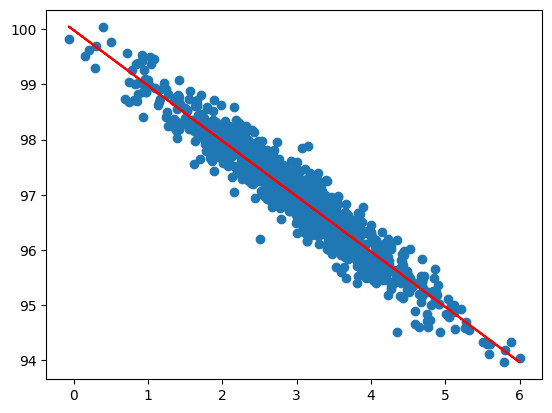

In [17]:
plt.scatter(page_speed_read, purchase_book) #this is the original scatter plot
plt.plot(page_speed_read, fitLine, c='r') #this is a simple line plot 
                                          #but the coordinates are of the line that we just found out.          
plt.show

In [18]:
#Introducing polynomail regression from here.

In [19]:
np.random.seed(2)
page_speed_read = np.random.normal(3.0, 1, 1000)

purchase_book = np.random.normal(50, 10, 1000)/page_speed_read

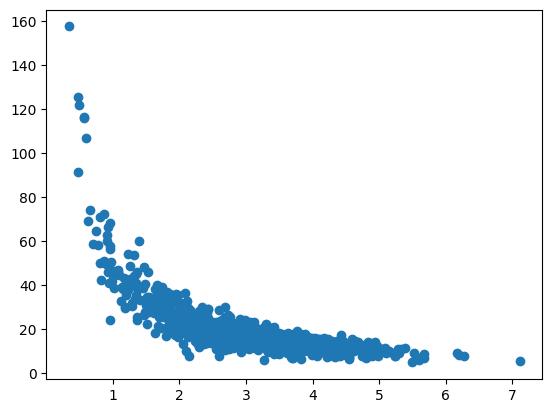

In [20]:
plt.scatter(page_speed_read, purchase_book)

In [21]:
x = np.array(page_speed_read)
y = np.array(purchase_book)

p4 = np.poly1d(np.polyfit(x,y,4))



In [22]:
p4


poly1d([   0.54005597,   -8.85641318,   52.25378374, -135.34422815,
        147.6050662 ])

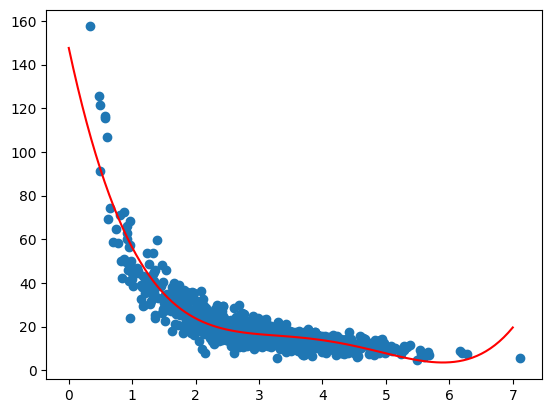

In [23]:
xp = np.linspace(0,7, 100)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [24]:
#calculating r-squared score now.

from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

In [25]:
r2

0.8293766396303073